t    |        Euler     |        RK4     |    Exact
-----------------------------------------------------
0.0  |      1.000000    |     1.000000   |   1.000000
0.2  |      1.000000    |     1.020201   |   1.020201
0.4  |      1.040000    |     1.083287   |   1.083287
0.6  |      1.123200    |     1.197217   |   1.197217
0.8  |      1.257984    |     1.377126   |   1.377128
1.0  |      1.459261    |     1.648717   |   1.648721


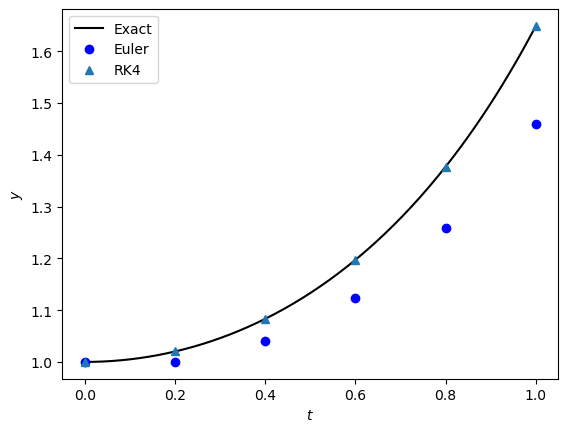

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros(len(t))
    t[0] = tspan[0]
    y[0] = y0

    for n in range(len(t) -1):
        y[n+1] = solver(f, t[n], y[n], h)
    return t, y

def rk4(f, tn, yn, h):
    k1 = f(tn, yn)
    k2 = f(tn + 0.5 * h, yn + 0.5 * h * k1)
    k3 = f(tn + 0.5 * h, yn + 0.5 * h * k2)
    k4 = f(tn + h, yn + h * k3)
    return yn + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def euler(f, t, y, h): 
    return y + h * f(t, y)


def f(t,y):
    return t * y

#Exact Solution
def exact(t):
    return np.exp(t ** 2 / 2)

# Define IVP parameters
tspan = [0, 1]   # boundaries of the t domain
y0 =  1          # initial value
h = 0.2        # step length

# Solve the IVP using the RK4 method
t, yRK4 = solveIVP(f, tspan, y0, h, rk4)

# Solve the IVP using the Euler method
t, yEuler = solveIVP(f, tspan, y0, h, euler)

# Print solutions
print('t    |        Euler     |        RK4     |    Exact\n-----------------------------------------------------')
for n in range(len(t)):
    print(f"{t[n]:0.1f}  |    {yEuler[n]:10.6f}    |   {yRK4[n]:10.6f}   | {exact(t[n]):10.6f}")

# Calculation of t_exact and y_exact
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)

# Plots
fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k-', label = 'Exact')
plt.plot(t, yEuler, 'bo', label = 'Euler')
plt.plot(t, yRK4, '^', label = 'RK4')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()